In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("student-mat.csv")
data.head()
#data.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
def object_cols(df):
    return list(df.select_dtypes(include='object').columns)
obj_col = object_cols(data)

In [4]:
lbnc = LabelEncoder()
for col in obj_col:
    data[col] = lbnc.fit_transform(data[col])

In [5]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

predict = "G3"
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
result = linear_regression.score(x_test, y_test)
print(result)

0.7345780987791743


In [7]:
predictions = linear_regression.predict(x_test)
    
print(predictions[x], x_test[x], y_test[x])

[[ 6.39003146  9.5338055   9.11268889  6.27165748  9.5338055 ]
 [ 6.39003146  6.39003146  9.11268889  6.27165748 12.59106138]
 [11.09026512  8.5005056   9.11268889 14.5534155   7.87457376]
 ...
 [ 7.87457376  8.5005056  12.94595736 14.5534155  14.5534155 ]
 [16.50429903 13.18656456 12.94595736  6.27165748  6.27165748]
 [ 8.5005056  12.77618954 12.94595736  6.27165748  6.39003146]] [[[ 7  8  2  3 10]
  [10 10  2  0  2]
  [ 8 10  2  0  0]
  [ 8  7  1  1  7]
  [10 10  2  0  2]]

 [[ 7  8  2  3 10]
  [ 7  8  2  3 10]
  [ 8 10  2  0  0]
  [ 8  7  1  1  7]
  [11 13  2  0  2]]

 [[13 11  2  0  4]
  [10  9  2  0  0]
  [ 8 10  2  0  0]
  [13 15  4  0  0]
  [10  8  1  0  6]]

 ...

 [[10  8  1  0  6]
  [10  9  2  0  0]
  [15 13  3  2 14]
  [13 15  4  0  0]
  [13 15  4  0  0]]

 [[18 16  3  0  0]
  [14 13  2  0  4]
  [15 13  3  2 14]
  [ 8  7  1  1  7]
  [ 8  7  1  1  7]]

 [[10  9  2  0  0]
  [13 13  4  0  4]
  [15 13  3  2 14]
  [ 8  7  1  1  7]
  [ 7  8  2  3 10]]] [[10 10 12  8 10]
 [10 10 12

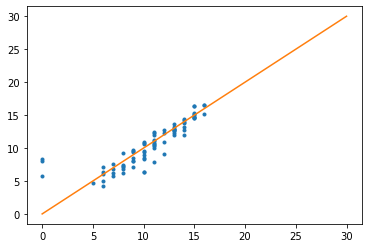

In [8]:
y_pred = linear_regression.predict(x_test) 
plt.plot(y_test,y_pred, '.')

#plt.scatter(x,y)

#line
x = np.linspace(0,30, 50)
y = x
plt.plot(x, y)
plt.show()